<center><img src="http://pitchatpalace.com/wp-content/uploads/2018/03/chosen.png" style="margin: 20px; height: 180px; border: 1px solid black">

<font size=20>Technical task for data role</font></center>

- For part 1, you can zip me the code and send it by email, but bonus point if it’s a link to a private git (Bitbucket or Github) repo with a proper commit history.
- For part 2 you can do it however you want, just text with explanation or in code with comments.
- For part 3 if you have working code that would be awesome, if not what’s really important is your thought process so try to explain that as much as you can :)

# part 1

## Q

1 - Given the following JSON structure:

`{
"animals": [
{
"type": "cat", #Can be cat/dog/snake/
"name": "Doe", #Can be anything,
"age": 5, #Integer
"color" [
{
"code": "red" #Can be red,black,yellow,white
},
]
}
]
}`

Write a program sorting the animals by either color or type with the possiblity to save the output to a json or display it formatted in the console
Input argument will be a json file.

The language used should be Python.

Bonus points for unit tests and code readability

## A

In [9]:
import json
from ipywidgets import interact, interactive, fixed, interact_manual, SelectionSlider
from pprint import pprint

!ls

CambridgeAI_notes.txt
Chosen AI data role candidates 2018-Copy2.ipynb
Chosen AI data role candidates 2018.ipynb
Chosen AI data role candidates 2018.py
ConDyn
Creative AI Data Engineer Candidates 2018.ipynb
OliverSteadman_CV_DSI (1).pdf
Recordings
Screen Shot 2018-06-13 at 17.06.53 (2).png
Screen Shot 2018-06-13 at 17.06.53.png
Screen Shot 2018-06-13 at 19.16.24 (2).png
Screen Shot 2018-06-13 at 19.16.24.png
Tickets
Tigmus
Twitterbots
_GA
_Tuts
__pycache__
blah.txt
jsonsort.py
jsonsort.txt
mallet-2.0.8
test_jsonsort.py
time.py


In [10]:
# lets import unittest script `test_jsonsort.py`, to conduct a test in situ
%run -i test_jsonsort.py

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [11]:
animals_json = '''{
"animals": [
{
"type": "cat", "name": "Doe", "age": 5, "color": [{"code": "red"}]},
{
"type": "dog", "name": "Coe", "age": 3, "color": [{"code": "white"}]},
{
"type": "snake", "name": "S", "age": 4, "color": [{"code": "black"}]}
]}'''

data = json.loads(animals_json)
animals = data['animals']

# assuming animal 0 has typical schema, what are the keys for all animals?
animalzero = animals[0]
animalkeys = list(animalzero.keys())
sortedkeys = sorted(animalkeys)

In [12]:
# lets import the sort script `jsonsort.py`, to conduct a demo using ipywidget
from jsonsort import animaux

# define the interactive version of the sort script, for running here in .ipynb
def interactive_animaux(json_raw=animals_json, sort_by='age', reverse=False):
    print("Here's your json_raw sorted by ⭐️\33[1m\33[96m", sort_by, '\33[0m⭐️')
    pprint(animaux(json_raw=json_raw, sort_by=sort_by, reverse=reverse))

# #     uncomment the following to save output in `jsonsort.txt`
# #     (this is already performed by the .py script but not when run as .ipynb)
#     with open('jsonsort.txt', 'w') as file_update:
#          json.dump(animaux(json_raw=json_raw, sort_by=sort_by, reverse=reverse),
#                    file_update)


interact(interactive_animaux,
         sort_by={x: x for x in sortedkeys},
         );

interactive(children=(Text(value='{\n"animals": [\n{\n"type": "cat", "name": "Doe", "age": 5, "color": [{"code…

# part 2

## Q

2 - What is the following piece of code doing, what's wrong with it, and how would you refactor it (You can assume nothing is relying on this code)?

`import json
import csv
import datetime
import time`

`def func(var1,var2,var3,var4):
    dictionary = {}
    for value in var4:
        dictionary[value['n']] = time.mktime(time.strptime(value['b'],var2))
        with open(var1, 'w') as var5:
             json.dump(dictionary, var5)`

`func('blah.txt', '%d %b %y', [
{
"n": 'John Doe',
'b':'30 Nov 98'
},{’n': 'Josh Doe', 'b':'12 Apr 86'}])`

## A

purpose of the function:
- trying to find the difference between user DoB and starting date `01/01/1970 00:00:00`, by
- reading users' details from a python list of dicts,
- using `strptime` to convert date string to date value in seconds,
- and converting reformatted dict to jso to updata a text file.

issues with the code:
- `func()` could be improved by using more descriptive arg names
- `func()` is missing 1 required positional argument: either `var3` or `var4`
- json.dump is indented by 5 rather than 4 spaces, relative to the previous line
- in final line (applying the function to some user data) there's an accent \` instead of a quote '.

refactored version:

In [13]:
import json
import csv
import datetime
import time


def func(txt_old, date_format, users_list):
    dictionary = {}
    for value in users_list:
        dictionary[value['n']] = time.mktime(
            time.strptime(value['b'], date_format))
        with open(txt_old, 'w') as txt_new:
            json.dump(dictionary, txt_new)


func('blah.txt', '%d %b %y',
     [
         {"n": 'John Doe', 'b': '30 Nov 98'},
         {'n': 'Josh Doe', 'b': '12 Apr 86'}],
     )

# part 3

## Q

The Data Science team has just built a scraper that hoovered all the recommendations data from AngelList. After a quick chat with your project team, everybody thought it would be a great idea to index those reviews and make them searchable.

3 - Can you write a python script (or use another language of your choice) to (a) parse the following  json data stream, (b) create an LDA or another model of your choice for the review data and (c) convert the reviews into feature vectors using the model that you built. Command-line driven scripts are fine (e.g., with input and output filenames)

`{[ 'name ': 'Donna Summer',
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'I worked with Donna for 5 years and can highly recommend her as an experienced, knowledgeable. She is very hardworking designer with a meticulous eye for detail and creativity’,
        'I have worked with Donna for a number of years and have always found her to be extremely professional and a real expert in her field. '
        'Donna is always on the ball, highly organised and a real pleasure to work with.'
    ]
 ],
 [ 'name': ‘Justin Bieber’,
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'Justin is a consummate professional and a pleasure to work with at all times!’
    ]
 ]}`

## A part A: parsing a dirty json data stream

In [74]:
import json
from pprint import pprint

# add 2 new recommendations for Donna, to test n-gram detection for phrase "on the ball"
stream = '''
{[ 'name ': 'Donna Summer',
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'I worked with Donna for 5 years and can highly recommend her as an experienced, knowledgeable. She is very hardworking designer with a meticulous eye for detail and creativity’,
        'I have worked with Donna for a number of years and have always found her to be extremely professional and a real expert in her field. '
        'Donna is always on the ball, highly organised and a real pleasure to work with.',
        'Never fails to deliver, is an on the ball and professional worker’,
        'Is just so on the ball, I can highly recommend for work ethic’
    ]
 ],
 [ 'name': ‘Justin Bieber’,
    'updated': '2016-02-26T09:09:37',
    'recommendations': [
        'Justin is a consummate professional and a pleasure to work with at all times!’
    ]
 ]}
'''

# apply some edits to the raw string... probably best to RegEx but time did not allow!
substitutions_to_make = [

    # remove single spaces at ends of keys
    (' "', '"'),
    (" '", '"'),

    # remove some apostrophes which were used instead of quotes
    ("‘", '"'),
    ("’", '"'),
    ("'", '"'),

    # trim the text data
    ("    ", ' '),
    ("   ", ' '),
    ("  ", ' '),
    ("\n", ''),

    # apply other edits as necessary to reach correct json format
    ("[ ", '['),
    (" ]", ']'),
    ("{[", '[{'),
    ("]}", '}]'),
    ('" "', '", "'),
    (']], [', ']}, {')

]

for old, new in substitutions_to_make:
    stream = stream.replace(old, new)

data = json.loads(stream)
pprint(data)

[{'name': 'Donna Summer',
  'recommendations': ['I worked with Donna for 5 years and can highly '
                      'recommend her as an experienced, knowledgeable. She is '
                      'very hardworking designer with a meticulous eye for '
                      'detail and creativity',
                      'I have worked with Donna for a number of years and have '
                      'always found her to be extremely professional and a '
                      'real expert in her field.',
                      'Donna is always on the ball, highly organised and a '
                      'real pleasure to work with.',
                      'Never fails to deliver, is an on the ball and '
                      'professional worker',
                      'Is just so on the ball, I can highly recommend for work '
                      'ethic'],
  'updated': '2016-02-26T09:09:37'},
 {'name': 'Justin Bieber',
  'recommendations': ['Justin is a consummate professional and a p

In [75]:
df = pd.DataFrame({'name':[data[worker]['name'] for worker in range(len(data))],
                   'recommendations':[data[worker]['recommendations'] for worker in range(len(data))],
                   'reco_count':[len(data[worker]['recommendations']) for worker in range(len(data))]}
                 )
df

,name,reco_count,recommendations
0,Donna Summer,5,[I worked with Donna for 5 years and can highl...
1,Justin Bieber,1,[Justin is a consummate professional and a ple...


## A parts B-C: LDA model & feature vectors for the recommendations data

In [76]:
import re; import numpy as np; import pandas as pd; import pickle

# import NLTK (for its stopwords)
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# plotting tools
import pyLDAvis; import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# tidy up the output
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliversteadman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(
            str(sentence),

            # remove punctuation
            deacc=True
        ))


data_words = list(sent_to_words(
    
    # cleaned json stream as obtained in pt1 above
    df['recommendations']))

# lets check that for Justin's recommendation
print(data_words[1])

['justin', 'is', 'consummate', 'professional', 'and', 'pleasure', 'to', 'work', 'with', 'at', 'all', 'times']


In [78]:
# grab bigram & trigram models
bigram = gensim.models.Phrases(data_words, min_count=2)
trigram = gensim.models.Phrases(bigram[data_words], min_count=2)

# lets check that, now for Donna's recommendations (mainly checking for trigram "on_the_ball")
print(trigram[bigram[data_words[0]]])

['worked', 'with', 'donna', 'for', 'years', 'and', 'can', 'highly', 'recommend', 'her', 'as', 'an', 'experienced', 'knowledgeable', 'she', 'is', 'very', 'hardworking', 'designer', 'with', 'meticulous', 'eye', 'for', 'detail', 'and', 'creativity', 'have', 'worked', 'with', 'donna', 'for', 'number', 'of', 'years', 'and', 'have', 'always', 'found', 'her', 'to', 'be', 'extremely', 'professional', 'and', 'real', 'expert', 'in', 'her', 'field', 'donna', 'is', 'always', 'on_the_ball', 'highly', 'organised', 'and', 'real', 'pleasure', 'to', 'work', 'with', 'never', 'fails', 'to', 'deliver', 'is', 'an', 'on_the_ball', 'and', 'professional', 'worker', 'is', 'just', 'so', 'on_the_ball', 'can', 'highly', 'recommend', 'for', 'work', 'ethic']


/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [79]:
# we'll need to remove stops, bigrams, trigrams, and apply lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words]
            for doc in texts]


def make_bigrams(texts):
    return [bigram[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]


# initialize spacy 'en' model; will be needed in lemmatization function below
nlp = spacy.load('en', disable=['parser', 'ner'])


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_
                          for token in doc
                          if token.pos_ in allowed_postags])
    return texts_out

In [83]:
# lets apply those functions in an order that preserves "on the ball" trigram
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams = make_trigrams(data_words_bigrams)
data_words_nostops = remove_stopwords(data_words_trigrams)

# lemmatize, restricting to 4 key parts of speech
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# lets check that
print(data_lemmatized[:1])

[['work', 'donna', 'year', 'highly', 'recommend', 'experience', 'knowledgeable', 'hardworking', 'designer', 'meticulous', 'eye', 'detail', 'creativity', 'work', 'donna', 'number', 'year', 'always', 'find', 'extremely', 'professional', 'real', 'expert', 'field', 'donna', 'always', 'highly', 'organise', 'real', 'pleasure', 'work', 'never', 'fail', 'deliver', 'on_the_ball', 'professional', 'worker', 'on_the_ball', 'highly', 'recommend', 'work', 'ethic']]


/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [86]:
# create our dictionary
id2word = corpora.Dictionary(data_lemmatized)

# create our corpus
texts = data_lemmatized

# set TDF
corpus = [id2word.doc2bow(text) for text in texts]

# lets check that
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 2), (25, 2), (26, 4), (27, 1), (28, 2)]]


[[('always', 2),
  ('creativity', 1),
  ('deliver', 1),
  ('designer', 1),
  ('detail', 1),
  ('donna', 3),
  ('ethic', 1),
  ('experience', 1),
  ('expert', 1),
  ('extremely', 1),
  ('eye', 1),
  ('fail', 1),
  ('field', 1),
  ('find', 1),
  ('hardworking', 1),
  ('highly', 3),
  ('knowledgeable', 1),
  ('meticulous', 1),
  ('never', 1),
  ('number', 1),
  ('on_the_ball', 2),
  ('organise', 1),
  ('pleasure', 1),
  ('professional', 2),
  ('real', 2),
  ('recommend', 2),
  ('work', 4),
  ('worker', 1),
  ('year', 2)]]

In [90]:
# build LDA model and pickle it,
# then comment out this cell, using pickle to load in
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pickle.dump(lda_model, open('lda_model.sav', 'wb'))

In [91]:
lda_model = pickle.load(open('lda_model.sav', 'rb'))

In [92]:
# check the top 10 tokens for each of the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"professional" + 0.031*"pleasure" + 0.031*"time" + 0.031*"justin" + '
  '0.031*"consummate" + 0.031*"work" + 0.031*"highly" + 0.031*"donna" + '
  '0.031*"real" + 0.031*"on_the_ball"'),
 (1,
  '0.031*"work" + 0.031*"professional" + 0.031*"pleasure" + 0.031*"time" + '
  '0.031*"consummate" + 0.031*"justin" + 0.031*"highly" + 0.031*"donna" + '
  '0.031*"real" + 0.031*"year"'),
 (2,
  '0.033*"work" + 0.032*"highly" + 0.032*"donna" + 0.032*"real" + 0.032*"year" '
  '+ 0.032*"on_the_ball" + 0.032*"always" + 0.032*"professional" + '
  '0.031*"recommend" + 0.031*"ethic"'),
 (3,
  '0.031*"consummate" + 0.031*"pleasure" + 0.031*"work" + 0.031*"professional" '
  '+ 0.031*"highly" + 0.031*"justin" + 0.031*"time" + 0.031*"year" + '
  '0.031*"always" + 0.031*"real"'),
 (4,
  '0.100*"work" + 0.061*"professional" + 0.061*"donna" + 0.061*"highly" + '
  '0.041*"pleasure" + 0.041*"recommend" + 0.041*"always" + 0.041*"on_the_ball" '
  '+ 0.041*"year" + 0.041*"real"'),
 (5,
  '0.031*"pleasure

In [1]:
# lets check the perplexity score (lower score = better model)
print('Perplexity =', lda_model.log_perplexity(corpus))

# and the coherence score (will try to improve it, using mallet)
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=data_lemmatized,
                                     dictionary=id2word,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence =', coherence_lda)

NameError: name 'lda_model' is not defined

In [94]:
# visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus,
                        id2word, mds='mmds')

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      98.779053        1       1 -0.024746 -0.006137
2       0.177807        1       2  0.002575  0.000636
9       0.130396        1       3  0.002770  0.000692
3       0.130395        1       4  0.002772  0.000686
8       0.130393        1       5  0.002772  0.000686
7       0.130393        1       6  0.002771  0.000688
5       0.130393        1       7  0.002771  0.000689
6       0.130392        1       8  0.002772  0.000686
0       0.130392        1       9  0.002771  0.000687
1       0.130392        1      10  0.002772  0.000687, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
26    Default  4.000000           work  4.000000  30.0000  30.0000
23    Default  2.000000   professional  2.000000  29.0000  29.0000
15    Default  2.000000         highly  2.000000  28.0000  28.0000
5     Default  2.000000          donna  2.000000  27.0000  27.0000
22    Default  1.000000       pleasure  1.000000  26.0000  26.0000
25    Default  1.000000      recommend  1.000000  25.0000  25.0000
0     Default  1.000000         always  1.000000  24.0000  24.0000
20    Default  1.000000    on_the_ball  1.000000  23.0000  23.0000
28    Default  1.000000           year  1.000000  22.0000  22.0000
24    Default  1.000000           real  1.000000  21.0000  21.0000
30    Default  1.000000         justin  1.000000  20.0000  20.0000
29    Default  1.000000     consummate  1.000000  19.0000  19.0000
31    Default  1.000000           time  1.000000  18.0000  18.0000
12    Default  1.000000          field  1.000000  17.0000  17.0000
10    Default  1.000000            eye  1.000000  16.0000  16.0000
27    Default  1.000000         worker  1.000000  15.0000  15.0000
16    Default  1.000000  knowledgeable  1.000000  14.0000  14.0000
11    Default  1.000000           fail  1.000000  13.0000  13.0000
2     Default  1.000000        deliver  1.000000  12.0000  12.0000
18    Default  1.000000          never  1.000000  11.0000  11.0000
14    Default  1.000000    hardworking  1.000000  10.0000  10.0000
4     Default  1.000000         detail  1.000000   9.0000   9.0000
21    Default  1.000000       organise  1.000000   8.0000   8.0000
13    Default  1.000000           find  1.000000   7.0000   7.0000
17    Default  1.000000     meticulous  1.000000   6.0000   6.0000
7     Default  1.000000     experience  1.000000   5.0000   5.0000
9     Default  1.000000      extremely  1.000000   4.0000   4.0000
1     Default  1.000000     creativity  1.000000   3.0000   3.0000
8     Default  1.000000         expert  1.000000   2.0000   2.0000
19    Default  1.000000         number  1.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
19    Topic10  0.001956         number  1.036003   0.3701  -3.4657
8     Topic10  0.001956         expert  1.036267   0.3698  -3.4657
1     Topic10  0.001956     creativity  1.036317   0.3698  -3.4657
9     Topic10  0.001956      extremely  1.036456   0.3697  -3.4657
7     Topic10  0.001956     experience  1.036484   0.3696  -3.4657
17    Topic10  0.001956     meticulous  1.036632   0.3695  -3.4657
13    Topic10  0.001956           find  1.036694   0.3694  -3.4657
21    Topic10  0.001956       organise  1.036695   0.3694  -3.4657
4     Topic10  0.001956         detail  1.036847   0.3693  -3.4657
14    Topic10  0.001956    hardworking  1.036924   0.3692  -3.4657
18    Topic10  0.001956          never  1.037011   0.3691  -3.4657
2     Topic10  0.001956        deliver  1.037012   0.3691  -3.4657
11    Topic10  0.001956           fail  1.037064   0.3691  -3.4657
16    Topic10  0.001956  knowledgeable  1.037083   0.3691  -3.4657
27    Topic10  0.001956         worker  1.037139   0.3690  -3.4657
10    Topic10  0.001956            eye  1.037298   0.3688  -3.4657
12    Topic10  0.001956   

In [95]:
mallet_path = 'mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [96]:
# see if we've improved coherence score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

# and show me the topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('donna', 0.375),
   ('recommend', 0.25),
   ('work', 0.125),
   ('detail', 0.125),
   ('find', 0.125),
   ('on_the_ball', 0.0),
   ('organise', 0.0),
   ('pleasure', 0.0),
   ('professional', 0.0),
   ('never', 0.0)]),
 (1,
  [('pleasure', 0.6666666666666666),
   ('hardworking', 0.3333333333333333),
   ('professional', 0.0),
   ('recommend', 0.0),
   ('number', 0.0),
   ('on_the_ball', 0.0),
   ('organise', 0.0),
   ('meticulous', 0.0),
   ('real', 0.0),
   ('year', 0.0)]),
 (2,
  [('expert', 0.25),
   ('deliver', 0.25),
   ('professional', 0.25),
   ('fail', 0.25),
   ('real', 0.0),
   ('on_the_ball', 0.0),
   ('organise', 0.0),
   ('pleasure', 0.0),
   ('never', 0.0),
   ('recommend', 0.0)]),
 (3,
  [('meticulous', 0.3333333333333333),
   ('designer', 0.3333333333333333),
   ('experience', 0.3333333333333333),
   ('real', 0.0),
   ('number', 0.0),
   ('on_the_ball', 0.0),
   ('organise', 0.0),
   ('pleasure', 0.0),
   ('professional', 0.0),
   ('work', 0.0)]),
 (4,
  [('year

Coherece score is up by 9.9% ... great job!

/Users/oliversteadman/anaconda3/lib/python3.6/site-packages/gensim/models/wrappers/ldamallet.py:373: RuntimeWarning: invalid value encountered in true_divide
  return topics / topics.sum(axis=1)[:, None]


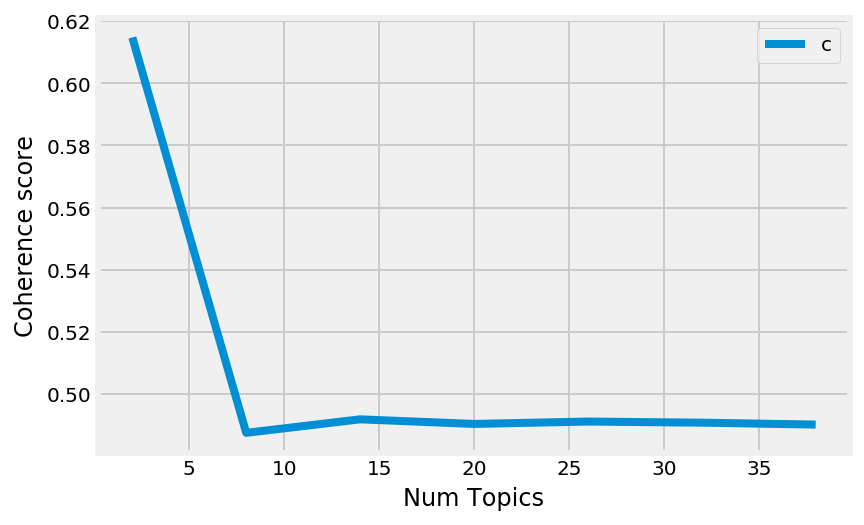

In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to LDA model w/ respective num of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                 corpus=corpus,
                                                 num_topics=num_topics,
                                                 id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# this is the memory-intensive step in the notebook: takes ~2mins to complete!
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_lemmatized,
                                                        start=2,
                                                        limit=40,
                                                        step=6)

# lets plot that
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score");

In [31]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6148
Num Topics = 8  has Coherence Value of 0.4875
Num Topics = 14  has Coherence Value of 0.4918
Num Topics = 20  has Coherence Value of 0.4903
Num Topics = 26  has Coherence Value of 0.4911
Num Topics = 32  has Coherence Value of 0.4907
Num Topics = 38  has Coherence Value of 0.4901


In [32]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.500*"field" + 0.500*"meticulous" + 0.000*"recommendation" + '
  '0.000*"update" + 0.000*"organise" + 0.000*"pleasure" + 0.000*"professional" '
  '+ 0.000*"real" + 0.000*"recommend" + 0.000*"never"'),
 (1,
  '0.500*"justin" + 0.500*"eye" + 0.000*"recommendation" + 0.000*"update" + '
  '0.000*"organise" + 0.000*"pleasure" + 0.000*"professional" + 0.000*"real" + '
  '0.000*"recommend" + 0.000*"never"'),
 (2,
  '0.500*"ball" + 0.500*"designer" + 0.000*"recommendation" + 0.000*"number" + '
  '0.000*"organise" + 0.000*"pleasure" + 0.000*"professional" + 0.000*"real" + '
  '0.000*"recommend" + 0.000*"never"'),
 (3,
  '0.500*"professional" + 0.250*"extremely" + 0.250*"organise" + '
  '0.000*"update" + 0.000*"pleasure" + 0.000*"real" + 0.000*"recommend" + '
  '0.000*"recommendation" + 0.000*"never" + 0.000*"summer"'),
 (4,
  '0.667*"recommend" + 0.333*"worker" + 0.000*"recommendation" + '
  '0.000*"update" + 0.000*"number" + 0.000*"organise" + 0.000*"pleasure" + '
  '0.000*"profession

In [33]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,16.0,0.0833,"work, knowledgeable, ethic, recommendation, up...","{'name': 'Donna Summer', 'updated': '2016-02-2..."
1,1,13.0,0.0806,"pleasure, consummate, professional, recommenda...","{'name': 'Justin Bieber', 'updated': '2016-02-..."


In [34]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,13.0,0.0806,"pleasure, consummate, professional, recommenda...","{'name': 'Justin Bieber', 'updated': '2016-02-..."
1,16.0,0.0833,"work, knowledgeable, ethic, recommendation, up...","{'name': 'Donna Summer', 'updated': '2016-02-2..."
